# Object Quality Controlling 

In practice, to improve the image segmentation, we can apply a post-processing quality control step. 
In MontePython, QualityControler implements multiple quality control measures to post-process identified objects:
These include:
* Removing objects based on a minimum area threshold 
* Merging near-by objects to mitigate object break-up
* Removing objects below a minimum length threshold
* Removing objects below a time duration threshold
* Removing objects based on the intensity within (e.g., is the maximum or 50th percentile value above a given threshold?)

In [1]:
import sys, os 
sys.path.append(os.path.dirname(os.getcwd()))

sys.path.insert(0, '/home/monte.flora/python_packages/MontePython')


In [2]:
import monte_python
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

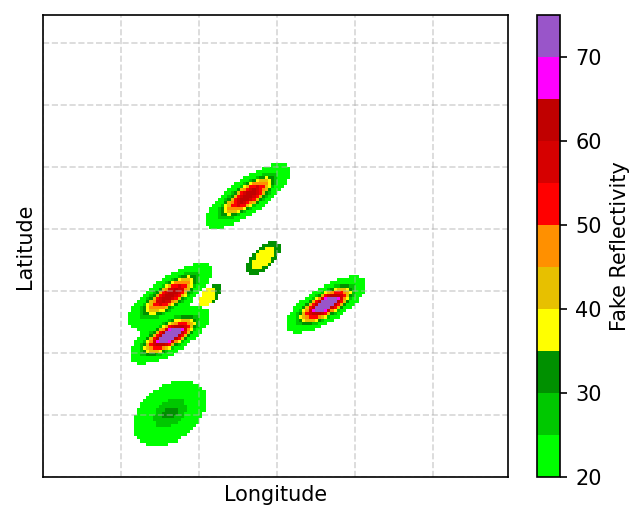

In [3]:
centers = [(40, 45), (40, 58), (65, 90), (90, 55), (40,20)]

storms,x,y = monte_python.create_fake_storms(centers, add_small_area=True)
monte_python.plot_fake_storms(x,y,storms)

In [4]:
storm_labels, object_props = monte_python.label( storms, 
                      method ='single_threshold', 
                      return_object_properties=True, 
                      params = {'bdry_thresh':25} )

To use the QualityControler, we send in the original data, the labelled data, the object properties, and then a list of the quality control measures to be applied. For this first example, we will remove smaller objects. 


### Removing objects based on their area

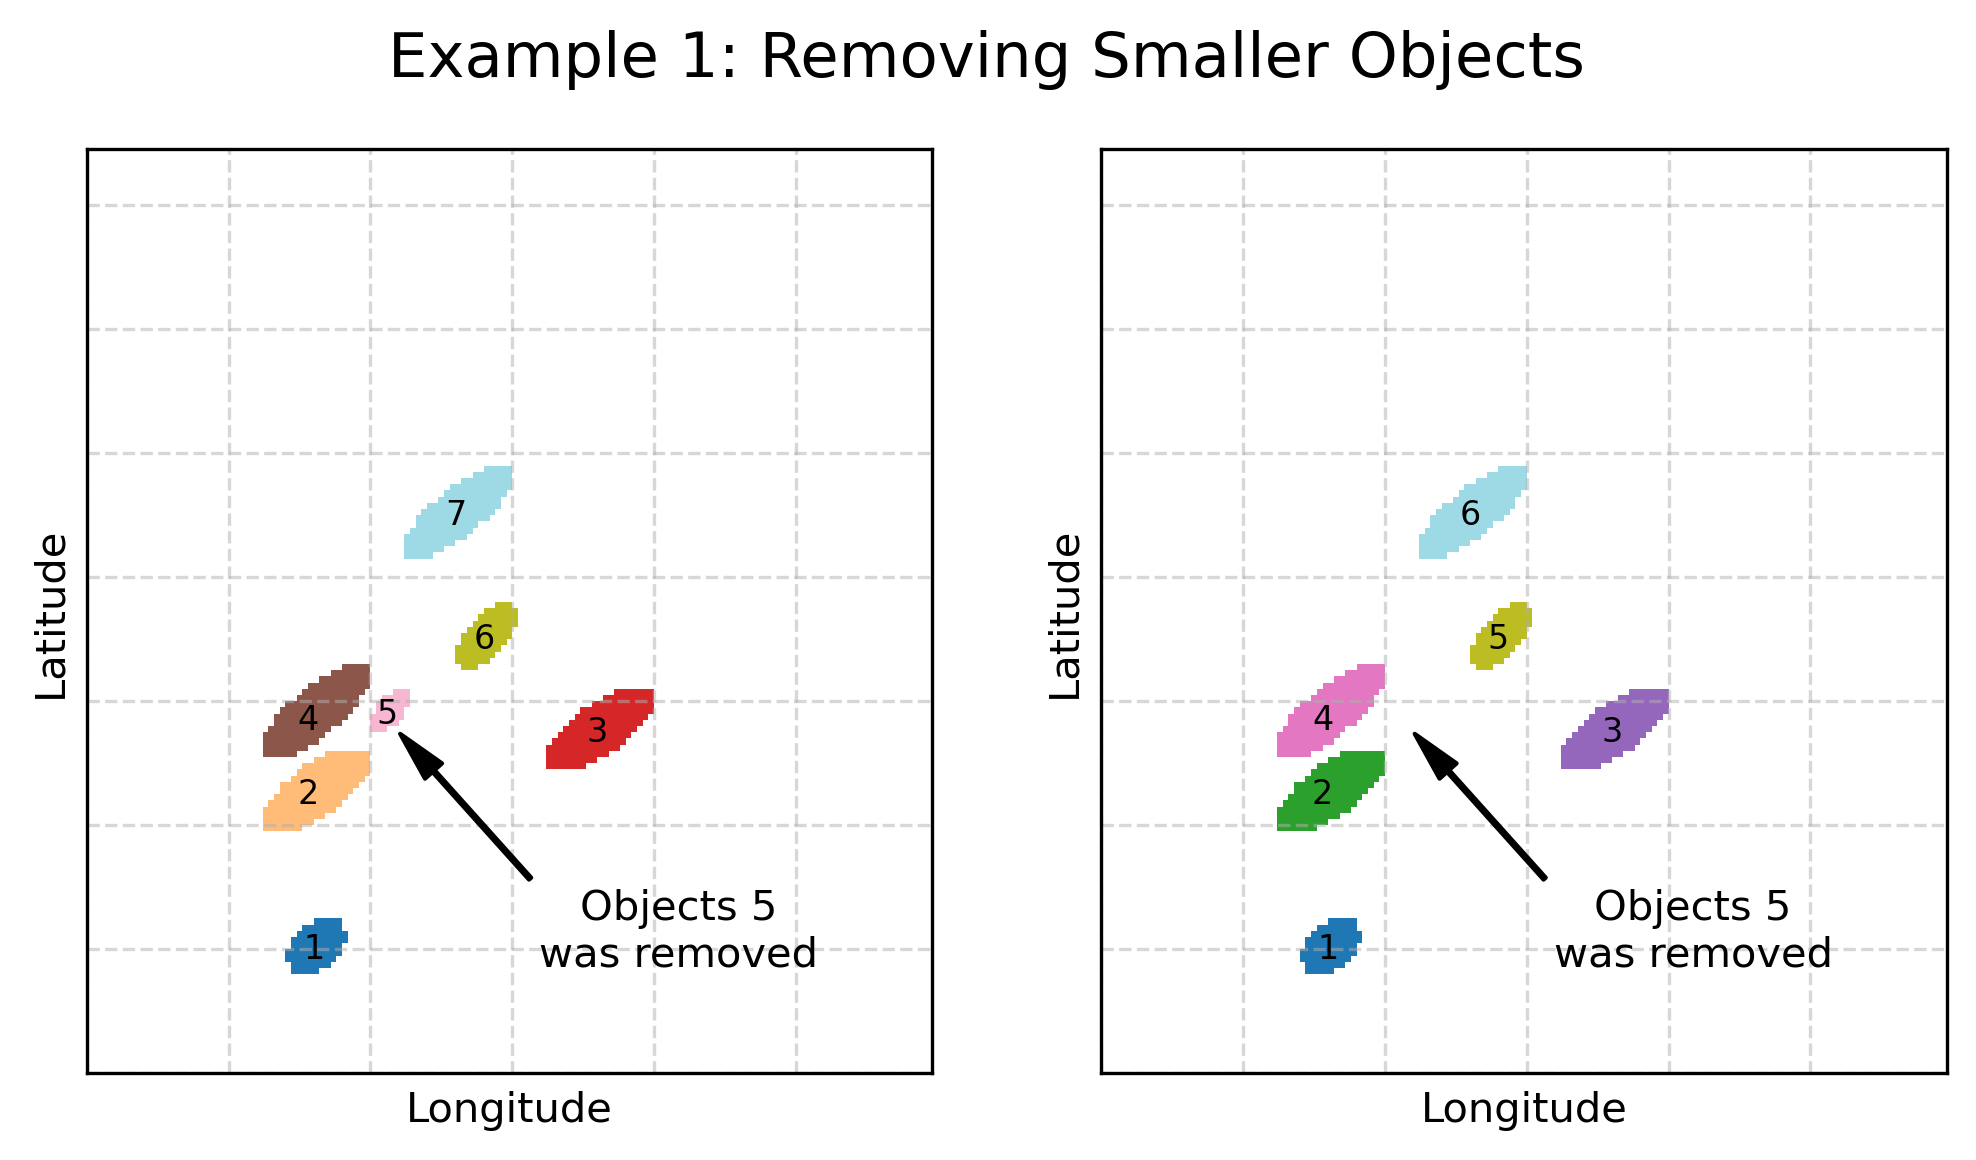

In [5]:
qcer = monte_python.QualityControler()
qc_params = [('min_area', 35)]
new_labels, new_props = qcer.quality_control(storms, storm_labels, object_props, qc_params)

fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
fig.suptitle('Example 1: Removing Smaller Objects', fontsize=15)
monte_python.plot_storm_labels(x, y, storm_labels, object_props, ax=axes[0])
monte_python.plot_storm_labels(x, y, new_labels, new_props, ax=axes[1])


for ax in axes:
    ax.annotate('Objects 5\nwas removed', 
                 xy = (55,55), xycoords='data',
                 xytext=(0.7, 0.2), textcoords='axes fraction',
                  arrowprops=dict(facecolor='black', shrink=0.01, width=0.7, headwidth=5.5),
            horizontalalignment='center', verticalalignment='top')

In [6]:
len(np.unique(storm_labels)[1:])-1 == len(np.unique(new_labels)[1:])

True

### Removing small objects and low intensity objects

For this next example, we will use both an area filter and an intensity filter for removing objects. 


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

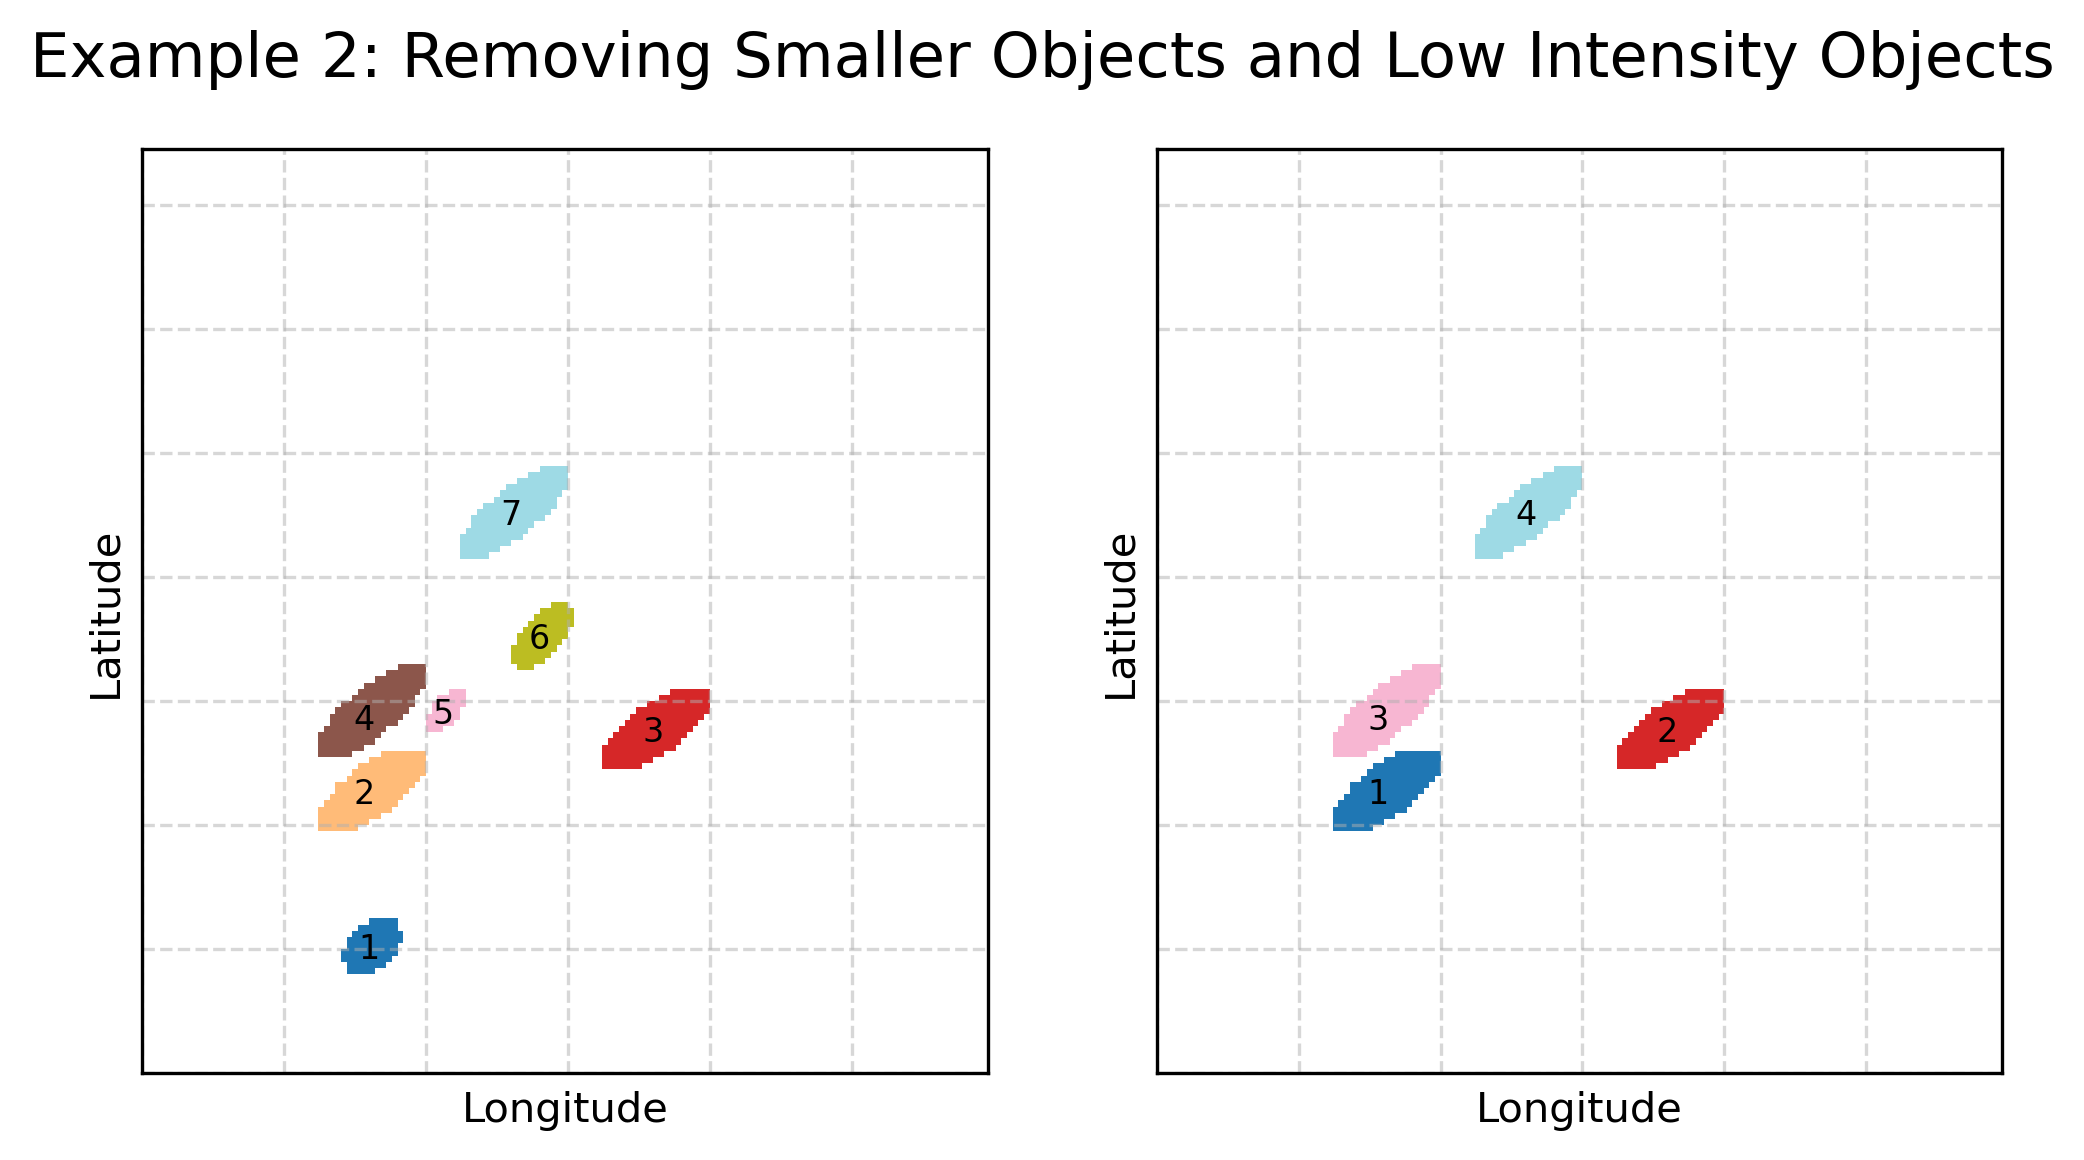

In [7]:
qcer = monte_python.QualityControler()

# To apply the intensity thresh, we use the 'max_thresh'. 
# In this case, we are removing objects if the Pth percentile is less than the given value
# Thus, for this example, we want the 90th percentile (the maximum value) to be above 
# a threshold of 60. 
qc_params = [('min_area', 35), ('max_thresh', (60, 100))]
new_labels, new_props = qcer.quality_control(storms, storm_labels, object_props, qc_params)

fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
fig.suptitle('Example 2: Removing Smaller Objects and Low Intensity Objects', fontsize=15)
monte_python.plot_storm_labels(x, y, storm_labels, object_props, ax=axes[0])
monte_python.plot_storm_labels(x, y, new_labels, new_props, ax=axes[1])

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

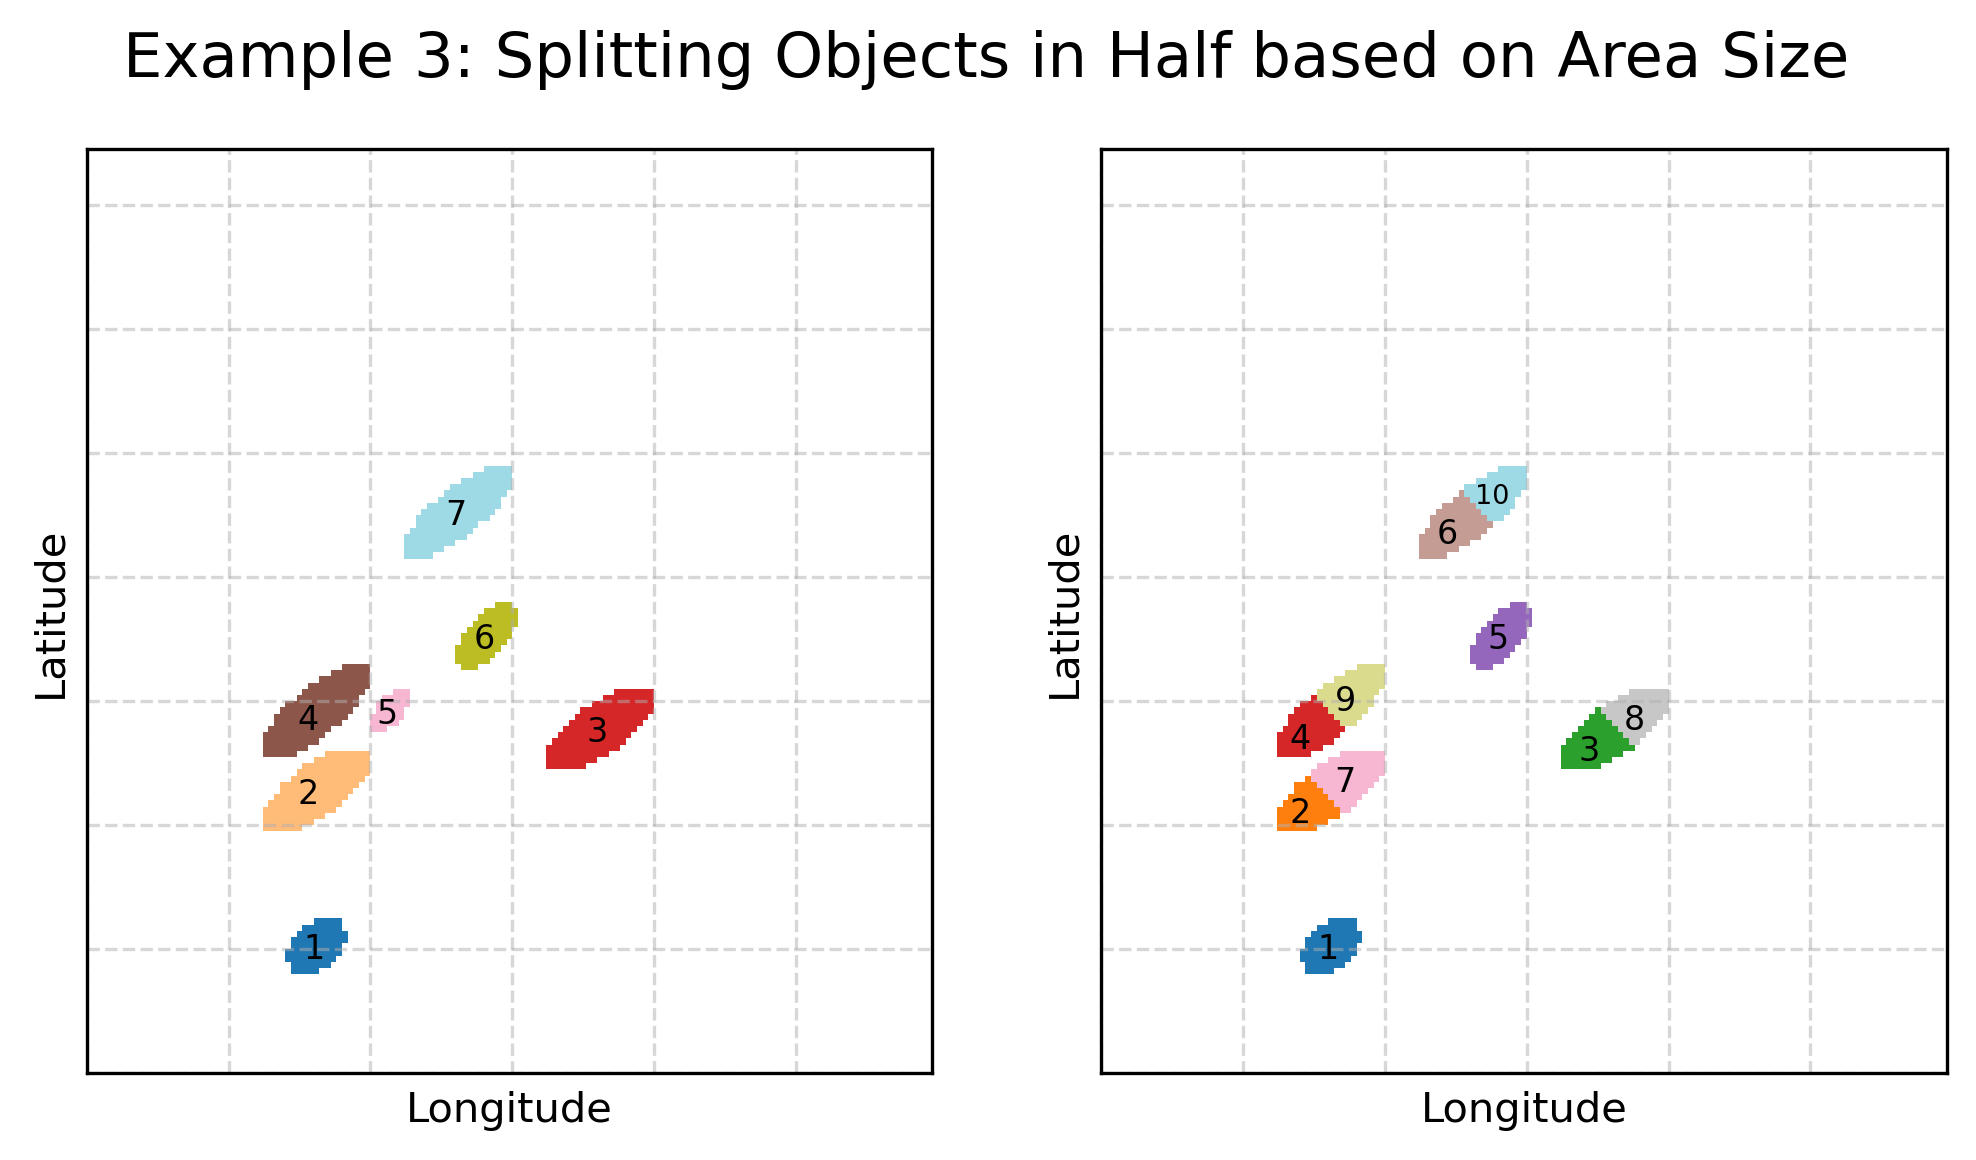

In [9]:
qcer = monte_python.QualityControler()

# To apply the intensity thresh, we use the 'max_thresh'. 
# In this case, we are removing objects if the Pth percentile is less than the given value
# Thus, for this example, we want the 90th percentile (the maximum value) to be above 
# a threshold of 60. 
qc_params = [('min_area', 35), ('max_area_before_split', (120))]
new_labels, new_props = qcer.quality_control(storms, storm_labels, object_props, qc_params)


fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
fig.suptitle('Example 3: Splitting Objects in Half based on Area Size', fontsize=15)
monte_python.plot_storm_labels(x, y, storm_labels, object_props, ax=axes[0])
monte_python.plot_storm_labels(x, y, new_labels, new_props, ax=axes[1])